# Student Performance Data

    The following data was obtained in a survey of students' math course in secondary school.
    It contains a lot of interesting Features like social, gender and study information about students.



### Importing Lybraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as ex
import seaborn as sns
from plotly.io import templates
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder


sns.set(style= 'whitegrid', color_codes=True)
sns.set_theme(context='notebook',style='darkgrid',
              palette='deep',font='sans-serif',font_scale=1,color_codes=True,rc=None)
%matplotlib inline

In [172]:
# to measure linear / non-linear relationship B/W two columns
!pip install ppscore
import ppscore as pps

In [173]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Descriptive Data Analysis 

In [174]:
df= pd.read_csv('student_data.csv')
df.head(10)
#df.shape

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [175]:
df.shape

(395, 33)

In [176]:
df.columns
#list all columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [177]:
df.info()
#list all column with data type & non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [178]:
df.isnull().sum()
#Check for missing values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [179]:
df.describe()
#shows descriptive statistics 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [180]:
df['Medu'].unique()
#shows unique value within a feature

array([4, 1, 3, 2, 0], dtype=int64)

In [181]:
df.select_dtypes(include=np.object)

C:\Users\DIGICOM\AppData\Local\Temp\ipykernel_8424\2384614674.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.select_dtypes(include=np.object)


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [182]:
df.select_dtypes(include=np.number)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [183]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


### Outlier Analysis

<AxesSubplot:>

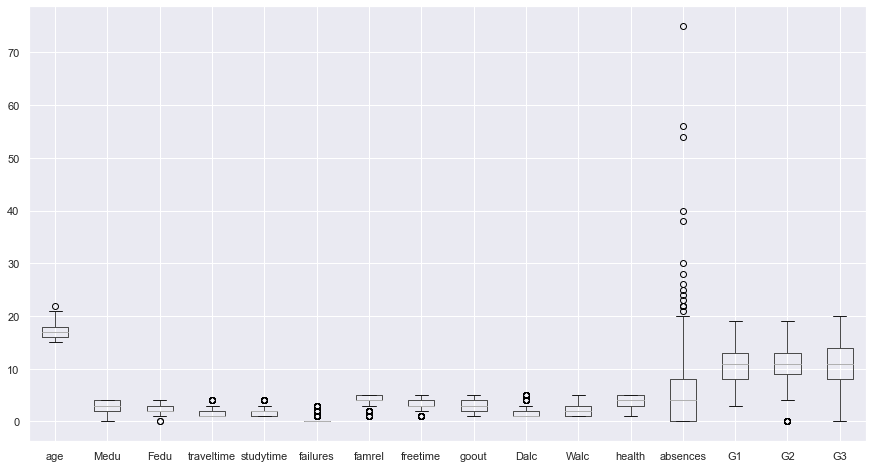

In [184]:
plt.figure(figsize=(15,8))
df.boxplot()

Most no. of outliers found in absence. Meaning these are the students with most number of absence.

### Feature Engineering

Engineering the three grade parameters (G1, G2 and G3) as one (Gmean) feature for relation analysis.

In [185]:
# Calculating average grade of each student using the grades (G1, G2 & G3)
G_mean= (df.G1 + df.G2 + df.G3) / 3
df['Gmean'] = G_mean
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gmean
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,15.000000
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,11.666667
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,5.666667
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,17.666667
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,14.666667


### Correlation Analysis

In [186]:
# checking relationship based on pearson correlation coefficient

corr=df.corr() #displays a correlation matrix
corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gmean
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.134589
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.224260
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457,0.175852
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142,-0.128197
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820,0.134565
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415,-0.375759
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363,0.021653
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307,0.003773
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791,-0.154511
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660,-0.072508


Pearson correlation only shows correlation between numeric values.

In [187]:
# Calculating the Predictive Power Score (PPS) matrix for all columns in the dataframe
pps_matrix = pps.matrix(df)

In [188]:
pps_df = pd.DataFrame(pps_matrix)
pps_df.loc[pps_df['x'] == 'Gmean']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
1122,Gmean,school,0.000000,classification,True,weighted F1,0.828917,0.823841,DecisionTreeClassifier()
1123,Gmean,sex,0.000000,classification,True,weighted F1,0.503797,0.450849,DecisionTreeClassifier()
1124,Gmean,age,0.000000,regression,True,mean absolute error,1.053165,1.156420,DecisionTreeRegressor()
1125,Gmean,address,0.000000,classification,True,weighted F1,0.679787,0.645180,DecisionTreeClassifier()
1126,Gmean,famsize,0.000000,classification,True,weighted F1,0.620253,0.601176,DecisionTreeClassifier()
1127,Gmean,Pstatus,0.064255,classification,True,weighted F1,0.847145,0.856966,DecisionTreeClassifier()
1128,Gmean,Medu,0.000000,regression,True,mean absolute error,0.913924,0.984267,DecisionTreeRegressor()
1129,Gmean,Fedu,0.000000,regression,True,mean absolute error,0.956962,1.034284,DecisionTreeRegressor()
1130,Gmean,Mjob,0.000000,classification,True,weighted F1,0.230380,0.221438,DecisionTreeClassifier()
1131,Gmean,Fjob,0.100538,classification,True,weighted F1,0.389873,0.451214,DecisionTreeClassifier()


<AxesSubplot:>

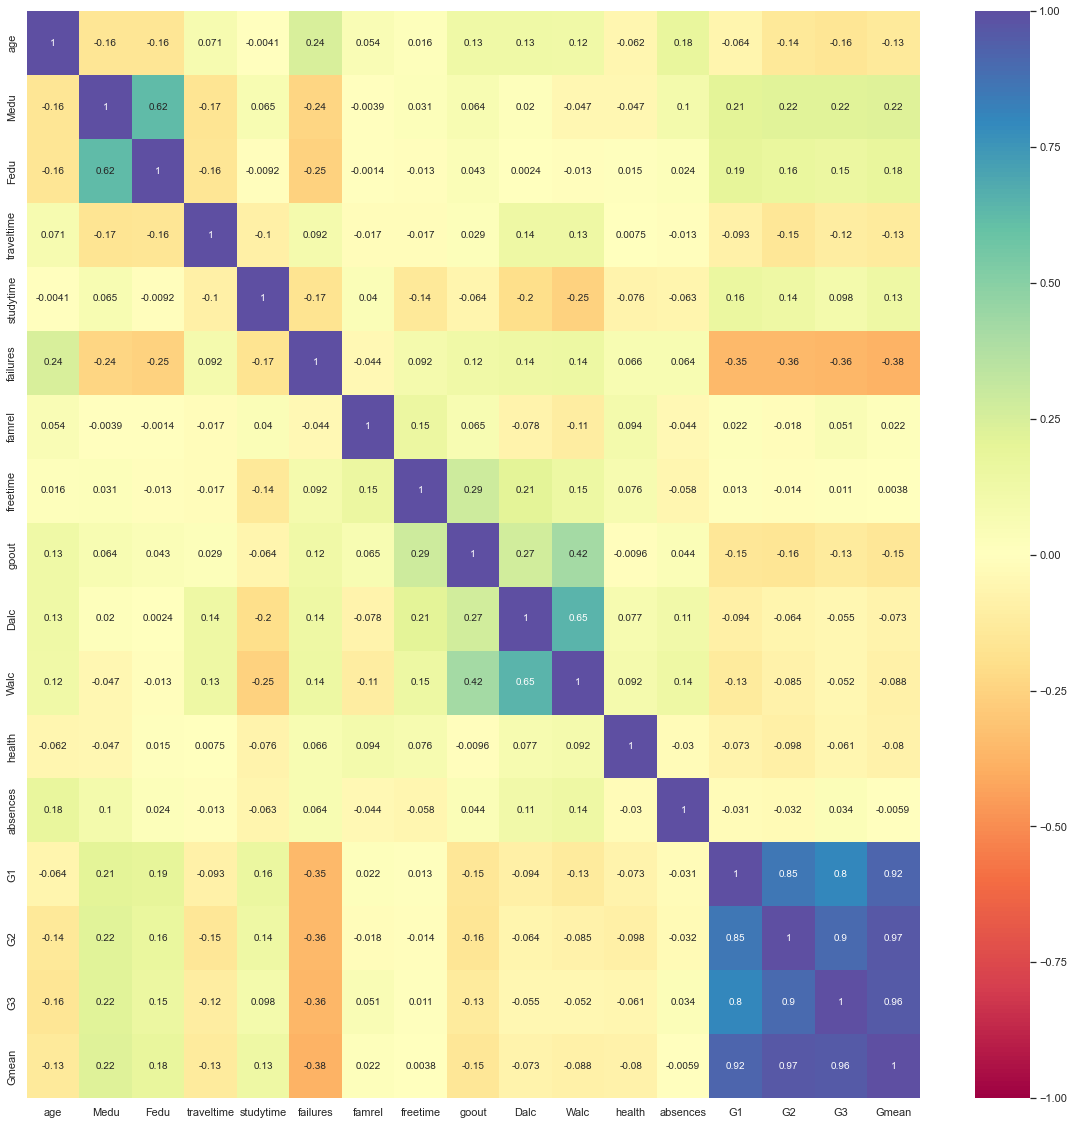

In [189]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), vmin=-1, cmap="Spectral", annot=True)

There is a strong positive relationship between the first period grade (G1), second period grade (G2) and final grade (G3) of the students

### Statistical Analysis

Visualizing Relationship between G1,G2 & G3

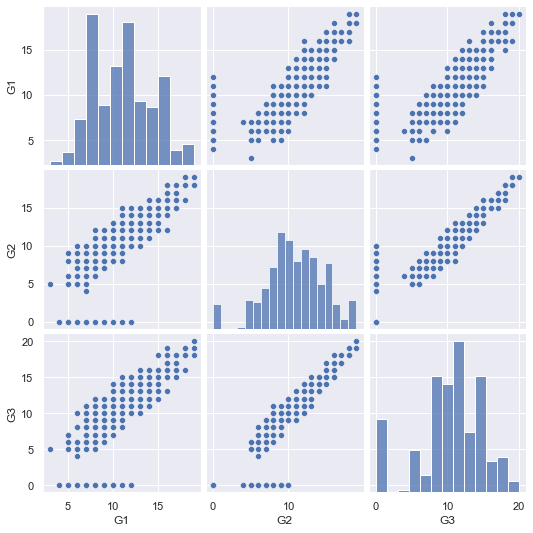

In [190]:
sns.pairplot(
    df,
    x_vars=["G1", "G2", "G3"],
    y_vars=["G1", "G2", "G3"],
)

Student Performance in G1,G2 & G3 accross Schools.

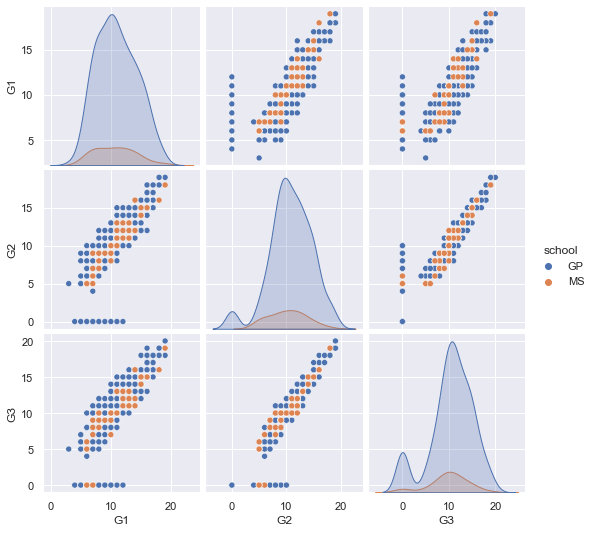

In [191]:
sns.pairplot(
    df,
    x_vars=["G1", "G2", "G3"],
    y_vars=["G1", "G2", "G3"],
    hue="school"
)

Students who perform well on their first and second period grades in Gabriel Pereira school generally perform better on their final grade compared to students of Mousinho da Silveira school.

Student Performance by Gender.

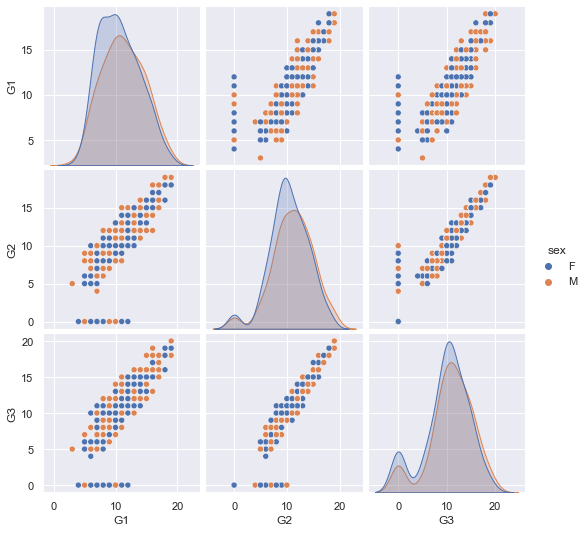

In [192]:
sns.pairplot(
    df,
    x_vars=["G1", "G2", "G3"],
    y_vars=["G1", "G2", "G3"],
    hue="sex"
)



Generally the females perform who do well in their first and second period grades perform better in their final grades than the males.


Student Performance by Geographic Location.

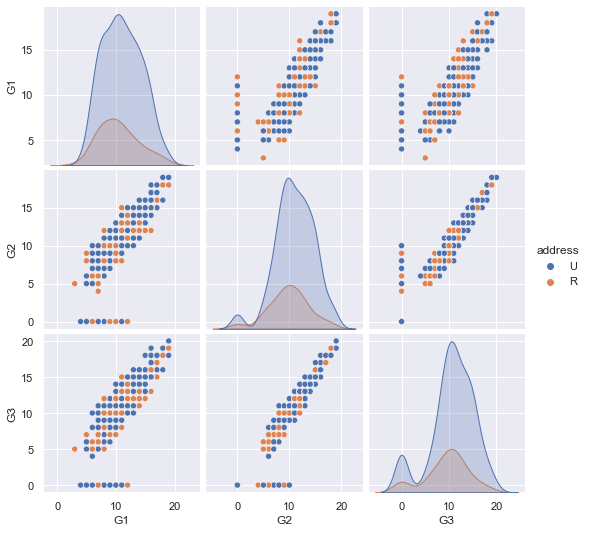

In [193]:
sns.pairplot(
    df,
    x_vars=["G1", "G2", "G3"],
    y_vars=["G1", "G2", "G3"],
    hue="address"
)



Generally the students in urban areas perform better than students in the rural areas.



Student Performance by Study Hours.

<AxesSubplot:xlabel='school', ylabel='Gmean'>

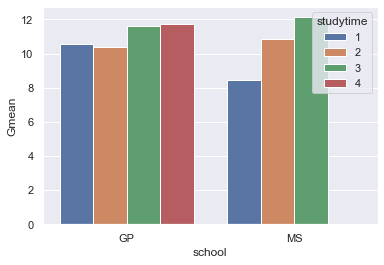

In [194]:
 sns.barplot(x="school",y="Gmean", hue="studytime", data=df, ci=False)



students who study longer hours in MS school perform better.


Students Failures by School.

<AxesSubplot:xlabel='school', ylabel='Gmean'>

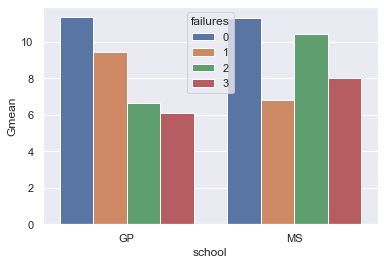

In [195]:
sns.barplot(x="school", y="Gmean", hue="failures", data=df, ci=False)


students fail more in Mousinho da Silveira school

Students performace by sex in terms of school

<AxesSubplot:xlabel='school', ylabel='Gmean'>

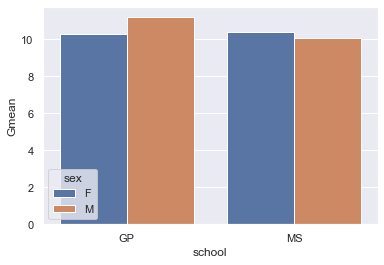

In [196]:
sns.barplot(x="school", y="Gmean", hue="sex", data=df, ci=False)

In GP school males perform better than the females on the otherhand in MS school females perform better.

Students Performance based on Internet access

<AxesSubplot:xlabel='school', ylabel='Gmean'>

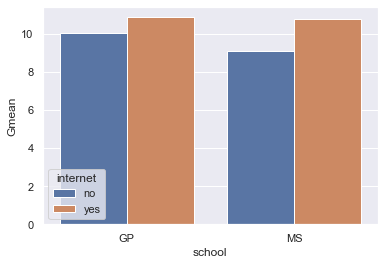

In [197]:
sns.barplot(x="school", y="Gmean", hue="internet", data=df, ci=False)

Students with Internet access tends to perform better in both schools

Students performance based on mother jobs

<AxesSubplot:xlabel='Mjob', ylabel='Gmean'>

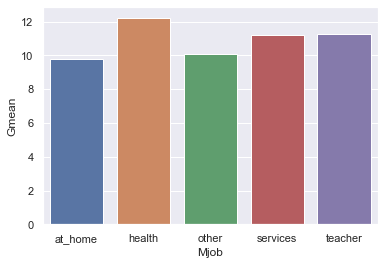

In [198]:
sns.barplot(x="Mjob", y="Gmean", data=df, ci=False)

### Feature Engineering 2

In [199]:
df.Gmean.head(20)

0      5.666667
1      5.333333
2      8.333333
3     14.666667
4      8.666667
5     15.000000
6     11.666667
7      5.666667
8     17.666667
9     14.666667
10     9.000000
11    11.333333
12    14.000000
13    10.333333
14    15.333333
15    14.000000
16    13.666667
17     9.333333
18     5.333333
19     9.333333
Name: Gmean, dtype: float64

Labeling the Average Grades (Gmean) into 3 catagories (Bad, Average, Good) for classification purpose

In [200]:
glabel=pd.cut(df.Gmean, bins=[0,9,14,20], labels=['Bad','Average','Good'])
df['Glabel']=glabel
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Gmean,Glabel
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,Bad
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,Bad
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,Bad
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,Bad
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,1,2,5,10,15,15,15,15.000000,Good
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,1,1,3,0,12,12,11,11.666667,Average
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,1,1,6,6,5,6,5.666667,Bad
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,1,1,1,0,16,18,19,17.666667,Good
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,1,5,0,14,15,15,14.666667,Good


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    object  
 1   sex         395 non-null    object  
 2   age         395 non-null    int64   
 3   address     395 non-null    object  
 4   famsize     395 non-null    object  
 5   Pstatus     395 non-null    object  
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    object  
 9   Fjob        395 non-null    object  
 10  reason      395 non-null    object  
 11  guardian    395 non-null    object  
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    object  
 16  famsup      395 non-null    object  
 17  paid        395 non-null    object  
 18  activities  395 non-null    object  
 19  nursery 

The dataset consists Multiple Object type attributes

Lets observe the object type data

In [202]:
df.select_dtypes(include='object').head(5)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


There're 17 features having dtypes as object

we have bserved from pps matrix that school, pstatus, higher along with some other object type have more impact on the average grade.
so we can assign some ranking to these columns and the for the other columns, they are nominal data
for the ordinal columns (in which Ranking is Important) we will go with the Label encoding and for the nominal column we will do One hot encoding


keeping a copy and not the same object reference so that we can use data later on

In [203]:
en_df = df.copy()

when to use label encoding & when to use one hot encoding
https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [204]:
# Label Encoding the following columns as the student's average grade is better when these have appropriate value.
lencoder = LabelEncoder() 
en_df['school'] = lencoder.fit_transform(en_df['school'])
en_df['higher'] = lencoder.fit_transform(en_df['higher'])
en_df['Pstatus'] = lencoder.fit_transform(en_df['Pstatus'])

In [205]:
# for the other categorical columns we'll do One hot encoding
for object_feature in en_df.dtypes[en_df.dtypes == 'object'].index:
     en_df[object_feature] = en_df[object_feature].astype('category')


In [206]:
en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    int32   
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    int32   
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [207]:
en_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Gmean,Glabel
0,0,F,18,U,GT3,0,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,Bad
1,0,F,17,U,GT3,1,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,Bad
2,0,F,15,U,LE3,1,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,Bad
3,0,F,15,U,GT3,1,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,Good
4,0,F,16,U,GT3,1,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,Bad


### Statistical Analysis 2

<AxesSubplot:xlabel='health', ylabel='Gmean'>

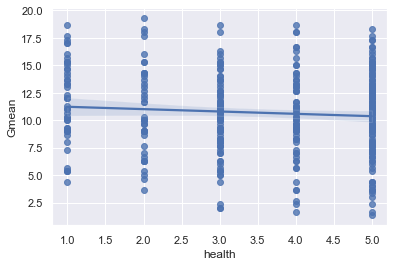

In [208]:
sns.regplot(x='health', y='Gmean', data=en_df)

<AxesSubplot:xlabel='absences', ylabel='Gmean'>

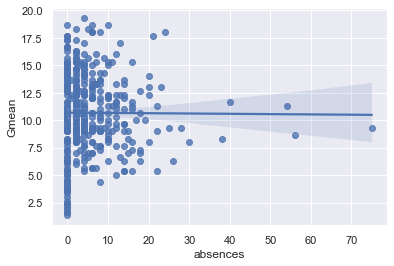

In [209]:
sns.regplot(x='absences', y='Gmean', data=en_df)

Visualizaion of data distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

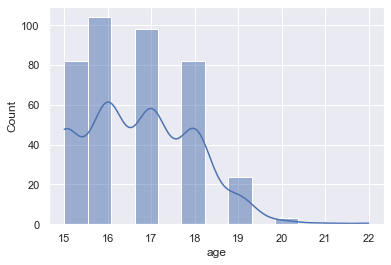

In [210]:

# Visualize distribution of `age`
sns.histplot(x='age', data=en_df, kde=True)


<AxesSubplot:xlabel='sex', ylabel='Count'>

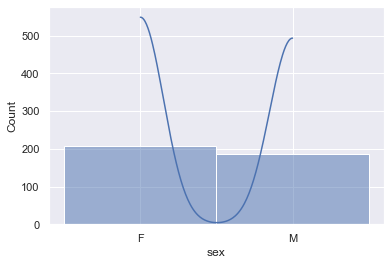

In [211]:
# Visualize distribution of `sex`
sns.histplot(x='sex', data=df, kde=True)

<AxesSubplot:xlabel='address', ylabel='Count'>

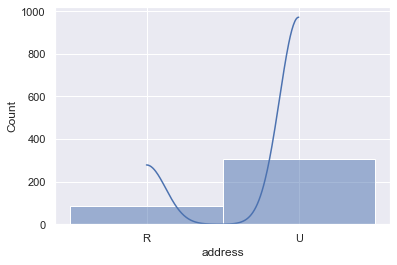

In [212]:
# Visualize distribution of `address`
sns.histplot(x='address', data=en_df, kde=True)

<AxesSubplot:xlabel='school', ylabel='Count'>

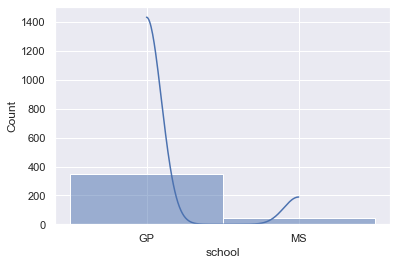

In [213]:
# Visualize distribution of `school`
sns.histplot(x='school', data=df, kde=True)

In [214]:
en_df['Glabel_n'] = lencoder.fit_transform(en_df['Glabel'])

In [215]:
en_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,Gmean,Glabel,Glabel_n
0,0,F,18,U,GT3,0,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,Bad,1
1,0,F,17,U,GT3,1,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,Bad,1
2,0,F,15,U,LE3,1,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,Bad,1
3,0,F,15,U,GT3,1,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,Good,2
4,0,F,16,U,GT3,1,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,Bad,1
5,0,M,16,U,LE3,1,4,3,services,other,...,1,2,5,10,15,15,15,15.000000,Good,2
6,0,M,16,U,LE3,1,2,2,other,other,...,1,1,3,0,12,12,11,11.666667,Average,0
7,0,F,17,U,GT3,0,4,4,other,teacher,...,1,1,1,6,6,5,6,5.666667,Bad,1
8,0,M,15,U,LE3,0,3,2,services,other,...,1,1,1,0,16,18,19,17.666667,Good,2
9,0,M,15,U,GT3,1,3,4,other,other,...,1,1,5,0,14,15,15,14.666667,Good,2


labels info categori types

In [216]:
en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    int32   
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    int32   
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [217]:
en_df['Glabel_n']=en_df['Glabel_n'].astype('category')

## Implementing Various Algorithms

### Unsepervised ML Algorithm

#### K Means

In [218]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [219]:
en_df1=pd.DataFrame(en_df, columns=["traveltime","Gmean"])
en_df1.head()

,traveltime,Gmean
0,2,5.666667
1,1,5.333333
2,1,8.333333
3,1,14.666667
4,1,8.666667


In [220]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(en_df1[['traveltime','Gmean']])
    sse.append(km.inertia_)

G:\PYTHON\Newfolder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


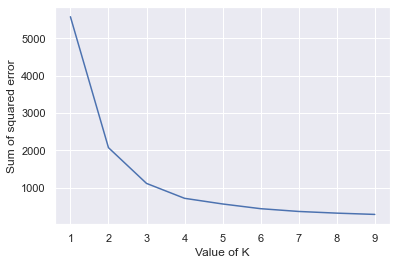

In [221]:
plt.xlabel('Value of K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Text(0, 0.5, 'Gmean')

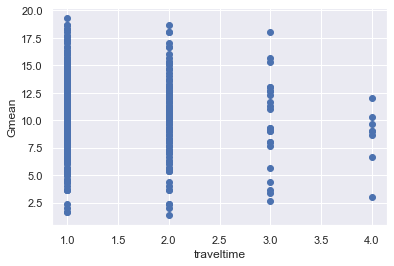

In [222]:
plt.scatter(en_df1['traveltime'],en_df1['Gmean'])
plt.xlabel('traveltime')
plt.ylabel('Gmean')

In [223]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(en_df1[['traveltime','Gmean']])
y_predicted

array([1, 1, 3, 2, 3, 2, 0, 1, 2, 2, 3, 0, 2, 3, 2, 2, 0, 3, 1, 3, 2, 2,
       2, 0, 3, 3, 0, 2, 0, 0, 0, 2, 2, 3, 0, 3, 2, 2, 0, 0, 3, 0, 2, 3,
       3, 3, 0, 2, 2, 3, 0, 0, 0, 3, 0, 3, 2, 2, 3, 2, 0, 3, 3, 3, 3, 2,
       0, 1, 3, 2, 2, 3, 1, 0, 0, 3, 0, 0, 3, 1, 0, 0, 1, 2, 3, 3, 3, 0,
       3, 3, 3, 2, 1, 3, 0, 3, 0, 3, 0, 3, 1, 2, 0, 1, 2, 0, 3, 2, 0, 2,
       2, 3, 0, 2, 3, 2, 0, 0, 3, 0, 2, 2, 0, 0, 3, 0, 3, 3, 1, 2, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 2, 1, 3, 3, 0, 1, 3, 1, 0, 1, 3, 1, 0, 3, 1,
       0, 3, 0, 3, 2, 0, 1, 3, 1, 3, 1, 0, 3, 2, 1, 2, 1, 2, 0, 1, 3, 3,
       0, 1, 3, 3, 3, 0, 2, 3, 0, 0, 0, 2, 3, 3, 0, 3, 3, 3, 0, 2, 2, 3,
       2, 3, 2, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 1, 1, 3, 3,
       1, 1, 2, 0, 0, 3, 2, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 2, 0, 3, 1, 2, 3, 3, 3, 3, 0, 3, 0, 0, 2, 1, 2, 3, 0, 3,
       1, 2, 3, 0, 3, 1, 3, 2, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0,
       2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 3, 0, 2, 0,

In [224]:
en_df1['cluster']=y_predicted
en_df1.head()

,traveltime,Gmean,cluster
0,2,5.666667,1
1,1,5.333333,1
2,1,8.333333,3
3,1,14.666667,2
4,1,8.666667,3


In [225]:
km.cluster_centers_

array([[ 1.424     , 12.10666667],
       [ 1.56666667,  4.72777778],
       [ 1.28395062, 15.73251029],
       [ 1.51937984,  8.89147287]])

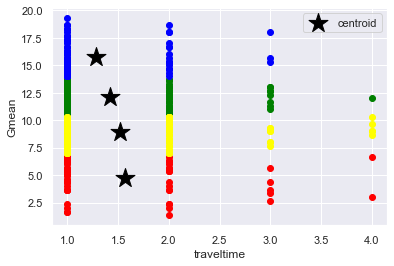

In [226]:
en_df01 = en_df[en_df1.cluster==0]
en_df02 = en_df[en_df1.cluster==1]
en_df03 = en_df[en_df1.cluster==2]
en_df04 = en_df[en_df1.cluster==3]

plt.scatter(en_df01.traveltime,en_df01['Gmean'],color='green')
plt.scatter(en_df02.traveltime,en_df02['Gmean'],color='red')
plt.scatter(en_df03.traveltime,en_df03['Gmean'],color='blue')
plt.scatter(en_df04.traveltime,en_df04['Gmean'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid',s=400)
plt.xlabel('traveltime')
plt.ylabel('Gmean')
plt.legend()

In [227]:
scaler = MinMaxScaler()

scaler.fit(en_df1[['Gmean']])
en_df1['Gmean'] = scaler.transform(en_df1[['Gmean']])

scaler.fit(en_df1[['traveltime']])
en_df1['traveltime'] = scaler.transform(en_df1[['traveltime']])

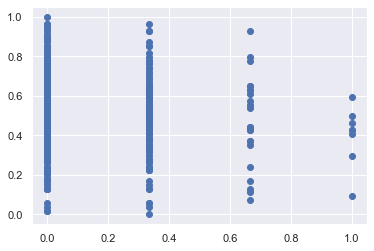

In [228]:
plt.scatter(en_df1.traveltime,en_df1['Gmean'])

In [229]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(en_df1[['traveltime','Gmean']])
y_predicted

array([0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 3, 1, 0, 1, 1, 1, 3, 2, 2, 1, 1,
       1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2,
       0, 2, 1, 1, 1, 2, 3, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 3, 2, 2, 2, 3,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1,
       0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 3, 1,
       1, 2, 1, 1, 2, 1, 0, 0, 3, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 3,
       1, 1, 3, 2, 3, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 3, 2, 1, 0, 2,
       1, 2, 1, 3, 3, 1, 0, 0, 0, 2, 3, 0, 2, 1, 2, 1, 3, 0, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 1, 1, 3,
       1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 1, 3, 0, 1, 0, 2, 1, 0, 0, 1, 1, 3, 2, 0, 0,
       2, 1, 0, 3, 0, 2, 2, 1, 0, 3, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [230]:
en_df1['cluster']=y_predicted
en_df1.head()

,traveltime,Gmean,cluster
0,0.333333,0.240741,0
1,0.000000,0.222222,2
2,0.000000,0.388889,2
3,0.000000,0.740741,1
4,0.000000,0.407407,2


In [231]:
km.cluster_centers_

array([[ 3.33333333e-01,  4.70740741e-01],
       [ 1.65484634e-02,  7.03835041e-01],
       [-1.11022302e-16,  3.63294188e-01],
       [ 7.52688172e-01,  4.54599761e-01]])

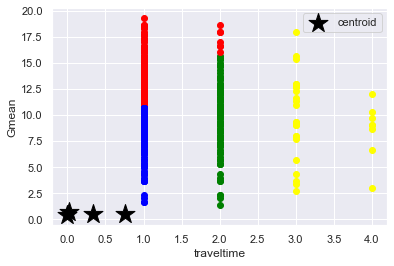

In [232]:
en_df01 = en_df[en_df1.cluster==0]
en_df02 = en_df[en_df1.cluster==1]
en_df03 = en_df[en_df1.cluster==2]
en_df04 = en_df[en_df1.cluster==3]

plt.scatter(en_df01.traveltime,en_df01['Gmean'],color='green')
plt.scatter(en_df02.traveltime,en_df02['Gmean'],color='red')
plt.scatter(en_df03.traveltime,en_df03['Gmean'],color='blue')
plt.scatter(en_df04.traveltime,en_df04['Gmean'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid',s=400)
plt.xlabel('traveltime')
plt.ylabel('Gmean')
plt.legend()

In [233]:
en_df2=pd.DataFrame(en_df, columns=["absences","Gmean"])
en_df2.head()

,absences,Gmean
0,6,5.666667
1,4,5.333333
2,10,8.333333
3,2,14.666667
4,4,8.666667


In [234]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(en_df2[['absences','Gmean']])
    sse.append(km.inertia_)

G:\PYTHON\Newfolder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


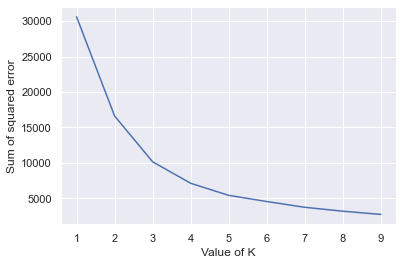

In [235]:
plt.xlabel('Value of K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Text(0, 0.5, 'Gmean')

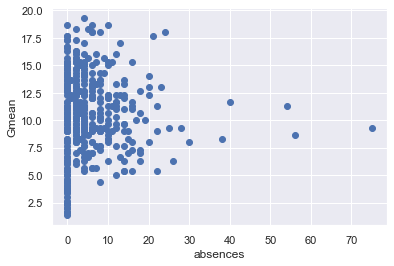

In [236]:
plt.scatter(en_df2['absences'],en_df2['Gmean'])
plt.xlabel('absences')
plt.ylabel('Gmean')

In [237]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(en_df2[['absences','Gmean']])
y_predicted

array([2, 2, 3, 0, 2, 3, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 3, 2, 0, 0,
       0, 0, 2, 3, 0, 0, 0, 3, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2,
       3, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 3, 0, 2, 2, 0, 1, 2, 0, 0, 2, 3, 0, 0, 3, 0, 2, 2, 2, 0,
       3, 3, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 3, 0, 0, 3, 0, 3, 2, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 0, 2, 2, 2, 0, 2, 2,
       3, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 3, 2, 3, 0, 0, 1, 3, 3, 0, 0, 2, 2, 3, 2, 3, 2, 0, 0, 0, 2,
       3, 2, 0, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 0, 3, 3, 0, 3, 3, 2, 2,
       2, 2, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 0, 2, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 3, 2, 0, 2,
       2, 3, 2, 0, 3, 2, 3, 0, 0, 0, 2, 0, 1, 3, 3, 0, 3, 3, 0, 2, 2, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 2, 3, 0, 0, 3,

In [238]:
en_df2['cluster']=y_predicted
en_df2.head()

,absences,Gmean,cluster
0,6,5.666667,2
1,4,5.333333,2
2,10,8.333333,3
3,2,14.666667,0
4,4,8.666667,2


In [239]:
km.cluster_centers_

array([[ 2.93209877, 13.77777778],
       [52.6       ,  9.86666667],
       [ 2.38666667,  7.52666667],
       [14.85897436, 10.35897436]])

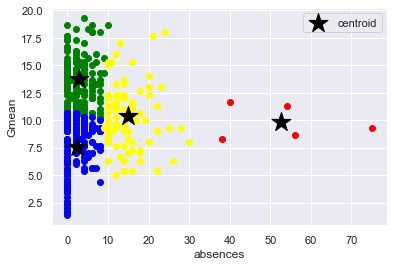

In [240]:
en_df21 = en_df2[en_df2.cluster==0]
en_df22 = en_df2[en_df2.cluster==1]
en_df23 = en_df2[en_df2.cluster==2]
en_df24 = en_df2[en_df2.cluster==3]

plt.scatter(en_df21.absences,en_df21['Gmean'],color='green')
plt.scatter(en_df22.absences,en_df22['Gmean'],color='red')
plt.scatter(en_df23.absences,en_df23['Gmean'],color='blue')
plt.scatter(en_df24.absences,en_df24['Gmean'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid',s=400)
plt.xlabel('absences')
plt.ylabel('Gmean')
plt.legend()

In [241]:
scaler = MinMaxScaler()

scaler.fit(en_df2[['Gmean']])
en_df2['Gmean'] = scaler.transform(en_df2[['Gmean']])

scaler.fit(en_df2[['absences']])
en_df2['absences'] = scaler.transform(en_df2[['absences']])

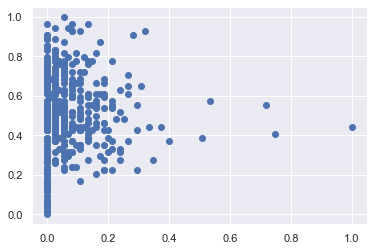

In [242]:
plt.scatter(en_df2.absences,en_df2['Gmean'])

In [243]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(en_df2[['absences','Gmean']])
y_predicted

array([0, 0, 3, 1, 3, 1, 3, 0, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 0, 3, 1, 1,
       1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 0, 1, 1, 3, 1, 3, 3, 1, 3,
       3, 0, 3, 1, 1, 0, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1,
       1, 0, 3, 1, 1, 3, 0, 1, 2, 3, 3, 3, 3, 0, 3, 3, 0, 1, 3, 3, 0, 1,
       3, 0, 0, 1, 0, 3, 1, 3, 1, 3, 1, 3, 0, 1, 1, 0, 1, 3, 3, 1, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 0, 1, 0, 0,
       3, 3, 0, 0, 0, 0, 1, 1, 0, 3, 3, 1, 0, 3, 0, 3, 0, 3, 0, 1, 3, 0,
       3, 3, 1, 3, 1, 3, 0, 0, 0, 3, 0, 3, 3, 1, 0, 1, 0, 1, 3, 0, 3, 3,
       1, 0, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3,
       1, 3, 1, 3, 3, 0, 3, 2, 0, 3, 3, 0, 3, 3, 1, 0, 3, 1, 0, 0, 0, 3,
       0, 0, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 0, 3, 3,
       0, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 3, 3, 3, 1, 3, 1, 0, 1, 3, 1, 3,
       0, 1, 3, 3, 3, 0, 3, 1, 3, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 0, 3, 1, 1, 3,

In [244]:
en_df2['cluster']=y_predicted
en_df2.head()

,absences,Gmean,cluster
0,0.080000,0.240741,0
1,0.053333,0.222222,0
2,0.133333,0.388889,3
3,0.026667,0.740741,1
4,0.053333,0.407407,3


In [245]:
km.cluster_centers_

array([[0.05148148, 0.21064815],
       [0.05537713, 0.73803731],
       [0.61142857, 0.45502646],
       [0.08096834, 0.47837782]])

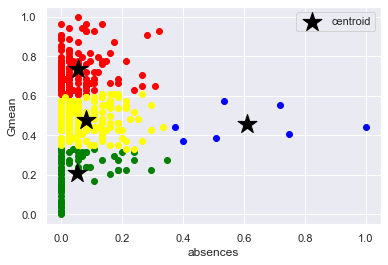

In [246]:
en_df21 = en_df2[en_df2.cluster==0]
en_df22 = en_df2[en_df2.cluster==1]
en_df23 = en_df2[en_df2.cluster==2]
en_df24 = en_df2[en_df2.cluster==3]

plt.scatter(en_df21.absences,en_df21['Gmean'],color='green')
plt.scatter(en_df22.absences,en_df22['Gmean'],color='red')
plt.scatter(en_df23.absences,en_df23['Gmean'],color='blue')
plt.scatter(en_df24.absences,en_df24['Gmean'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid',s=400)
plt.xlabel('absences')
plt.ylabel('Gmean')
plt.legend()

In [247]:
en_df3=pd.DataFrame(en_df, columns=["G1","Gmean"])
en_df3.head()

,G1,Gmean
0,5,5.666667
1,5,5.333333
2,7,8.333333
3,15,14.666667
4,6,8.666667


In [248]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(en_df3[['G1','Gmean']])
    sse.append(km.inertia_)

G:\PYTHON\Newfolder\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


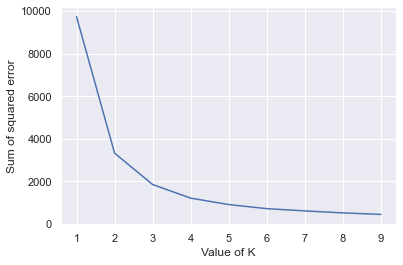

In [249]:
plt.xlabel('Value of K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Text(0, 0.5, 'Gmean')

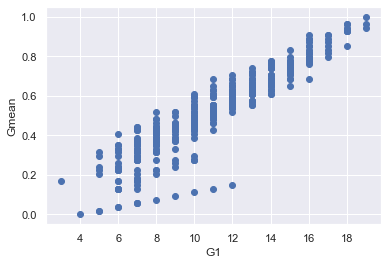

In [250]:
plt.scatter(en_df3['G1'],en_df2['Gmean'])
plt.xlabel('G1')
plt.ylabel('Gmean')

In [251]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(en_df3[['G1','Gmean']])
y_predicted

array([3, 3, 1, 0, 1, 0, 2, 3, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 3, 1, 2, 2,
       0, 2, 1, 3, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1,
       1, 1, 2, 0, 0, 3, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       2, 3, 1, 0, 2, 1, 3, 2, 2, 1, 2, 2, 1, 3, 2, 2, 3, 0, 1, 1, 1, 2,
       2, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 1, 3, 0, 2, 3, 0, 1, 1, 0, 2, 0,
       0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 3, 0, 3, 3,
       2, 2, 3, 3, 3, 3, 2, 0, 3, 1, 1, 2, 3, 1, 3, 1, 3, 1, 3, 2, 1, 3,
       2, 1, 0, 1, 0, 2, 3, 3, 3, 1, 3, 2, 1, 0, 3, 0, 3, 2, 2, 3, 1, 1,
       2, 3, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1,
       0, 1, 0, 1, 1, 3, 1, 1, 3, 2, 1, 3, 1, 2, 2, 3, 1, 0, 3, 3, 3, 1,
       3, 3, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 3, 2, 1,
       3, 2, 3, 0, 2, 3, 3, 2, 3, 1, 3, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1,
       3, 0, 1, 2, 1, 3, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2,

In [252]:
en_df3['cluster']=y_predicted
en_df3.head()

,G1,Gmean,cluster
0,5,5.666667,3
1,5,5.333333,3
2,7,8.333333,1
3,15,14.666667,0
4,6,8.666667,1


In [253]:
km.cluster_centers_

array([[15.75949367, 15.72995781],
       [ 8.88      ,  9.01866667],
       [12.12903226, 12.1827957 ],
       [ 6.71641791,  5.039801  ]])

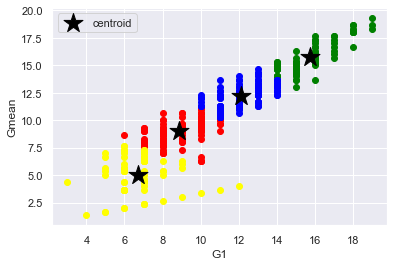

In [254]:
en_df31 = en_df3[en_df3.cluster==0]
en_df32 = en_df3[en_df3.cluster==1]
en_df33 = en_df3[en_df3.cluster==2]
en_df34 = en_df3[en_df3.cluster==3]

plt.scatter(en_df31.G1,en_df31['Gmean'],color='green')
plt.scatter(en_df32.G1,en_df32['Gmean'],color='red')
plt.scatter(en_df33.G1,en_df33['Gmean'],color='blue')
plt.scatter(en_df34.G1,en_df34['Gmean'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid',s=400)
plt.xlabel('G1')
plt.ylabel('Gmean')
plt.legend()

In [255]:
scaler = MinMaxScaler()

scaler.fit(en_df3[['Gmean']])
en_df3['Gmean'] = scaler.transform(en_df3[['Gmean']])

scaler.fit(en_df3[['G1']])
en_df3['G1'] = scaler.transform(en_df3[['G1']])

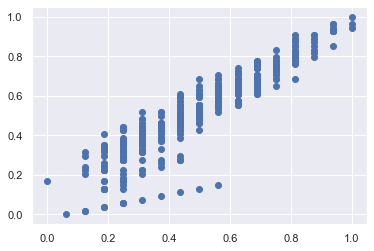

In [256]:
plt.scatter(en_df3.G1,en_df3['Gmean'])

In [257]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(en_df3[['G1','Gmean']])
y_predicted

array([3, 3, 0, 1, 0, 1, 2, 3, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 3, 0, 2, 2,
       1, 2, 0, 3, 2, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0,
       0, 0, 2, 1, 1, 3, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       2, 3, 0, 1, 2, 0, 3, 2, 2, 0, 2, 2, 0, 3, 2, 2, 3, 1, 0, 0, 0, 2,
       2, 0, 3, 1, 3, 2, 2, 0, 2, 0, 2, 0, 3, 1, 2, 3, 1, 0, 0, 1, 2, 1,
       1, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 3, 1, 0, 3,
       2, 2, 3, 3, 3, 3, 2, 1, 3, 0, 0, 2, 3, 0, 3, 0, 3, 0, 3, 2, 0, 3,
       2, 0, 1, 0, 1, 2, 3, 3, 3, 0, 3, 2, 0, 1, 3, 1, 3, 2, 2, 3, 0, 0,
       2, 3, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 3, 0, 0, 3, 2, 0, 3, 0, 2, 2, 3, 0, 1, 3, 3, 3, 0,
       3, 3, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 2, 0,
       3, 2, 3, 1, 2, 3, 3, 2, 3, 0, 3, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0,
       0, 1, 0, 2, 0, 3, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2,

In [258]:
en_df3['cluster']=y_predicted
en_df3.head()

,G1,Gmean,cluster
0,0.1250,0.240741,3
1,0.1250,0.222222,3
2,0.2500,0.388889,0
3,0.7500,0.740741,1
4,0.1875,0.407407,0


In [259]:
km.cluster_centers_

array([[0.367     , 0.42266667],
       [0.79746835, 0.79981247],
       [0.56944444, 0.60082305],
       [0.225     , 0.20569801]])

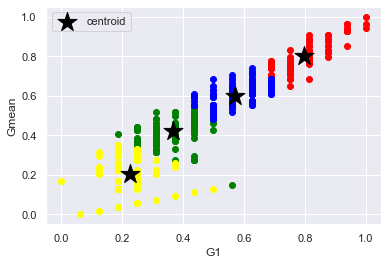

In [260]:
en_df31 = en_df3[en_df3.cluster==0]
en_df32 = en_df3[en_df3.cluster==1]
en_df33 = en_df3[en_df3.cluster==2]
en_df34 = en_df3[en_df3.cluster==3]

plt.scatter(en_df31.G1,en_df31['Gmean'],color='green')
plt.scatter(en_df32.G1,en_df32['Gmean'],color='red')
plt.scatter(en_df33.G1,en_df33['Gmean'],color='blue')
plt.scatter(en_df34.G1,en_df34['Gmean'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid',s=400)
plt.xlabel('G1')
plt.ylabel('Gmean')
plt.legend()

### Supervised ML Algorithm

#### KNN

In [428]:
en_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,Gmean,Glabel,Glabel_n
0,0,F,18,U,GT3,0,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,Bad,1
1,0,F,17,U,GT3,1,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,Bad,1
2,0,F,15,U,LE3,1,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,Bad,1
3,0,F,15,U,GT3,1,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,Good,2
4,0,F,16,U,GT3,1,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,Bad,1
5,0,M,16,U,LE3,1,4,3,services,other,...,1,2,5,10,15,15,15,15.000000,Good,2
6,0,M,16,U,LE3,1,2,2,other,other,...,1,1,3,0,12,12,11,11.666667,Average,0
7,0,F,17,U,GT3,0,4,4,other,teacher,...,1,1,1,6,6,5,6,5.666667,Bad,1
8,0,M,15,U,LE3,0,3,2,services,other,...,1,1,1,0,16,18,19,17.666667,Good,2
9,0,M,15,U,GT3,1,3,4,other,other,...,1,1,5,0,14,15,15,14.666667,Good,2


In [429]:
knn_df = en_df.copy()

In [430]:
knn_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,Gmean,Glabel,Glabel_n
0,0,F,18,U,GT3,0,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,Bad,1
1,0,F,17,U,GT3,1,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,Bad,1
2,0,F,15,U,LE3,1,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,Bad,1
3,0,F,15,U,GT3,1,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,Good,2
4,0,F,16,U,GT3,1,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,Bad,1


In [431]:
knn_df.drop(['Gmean','Glabel'], axis=1, inplace=True)

In [432]:
knn_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Glabel_n
0,0,F,18,U,GT3,0,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,0,F,17,U,GT3,1,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,0,F,15,U,LE3,1,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,0,F,15,U,GT3,1,4,2,health,services,...,2,2,1,1,5,2,15,14,15,2
4,0,F,16,U,GT3,1,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


In [433]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [434]:
knn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    int32   
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    int32   
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [435]:
knn_df.drop(['sex','address','famsize','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','internet','romantic'], axis=1, inplace=True)

In [436]:
knn_df.head(10)

,school,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,higher,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Glabel_n
0,0,18,0,4,4,2,2,0,1,4,3,4,1,1,3,6,5,6,6,1
1,0,17,1,1,1,1,2,0,1,5,3,3,1,1,3,4,5,5,6,1
2,0,15,1,1,1,1,2,3,1,4,3,2,2,3,3,10,7,8,10,1
3,0,15,1,4,2,1,3,0,1,3,2,2,1,1,5,2,15,14,15,2
4,0,16,1,3,3,1,2,0,1,4,3,2,1,2,5,4,6,10,10,1
5,0,16,1,4,3,1,2,0,1,5,4,2,1,2,5,10,15,15,15,2
6,0,16,1,2,2,1,2,0,1,4,4,4,1,1,3,0,12,12,11,0
7,0,17,0,4,4,2,2,0,1,4,1,4,1,1,1,6,6,5,6,1
8,0,15,0,3,2,1,2,0,1,4,2,2,1,1,1,0,16,18,19,2
9,0,15,1,3,4,1,2,0,1,5,5,1,1,1,5,0,14,15,15,2


In [437]:
knn_df.shape

(395, 20)

In [438]:
X=knn_df.iloc[:,0:19]
y=knn_df.iloc[:,19]
X_train, X_test, y_train ,y_test = train_test_split(X, y, random_state=1, test_size=0.3)


In [439]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [440]:
import math
math.sqrt(len(y_test))

10.908712114635714

In [441]:
classifier=KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')

In [442]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [443]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [444]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[60  6  0]
 [14 24  0]
 [ 4  0 11]]


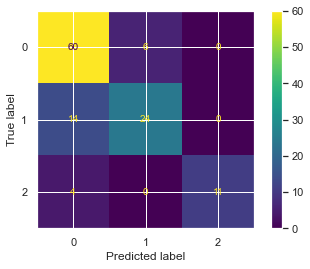

In [445]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

cm_display.plot()
plt.show()

In [446]:
print(accuracy_score(y_test, y_pred))

0.7983193277310925


In [459]:
pred_y_df=pd.DataFrame({'Actual Exam No.':y_test,'Predicted Exam No.':y_pred})
pred_y_df.head(20)

,Actual Exam No.,Predicted Exam No.
146,1,1
379,0,1
247,1,1
197,0,1
368,0,0
165,0,0
278,1,0
295,0,0
186,0,0
330,1,0


#### Multiple Linear Regression

In [460]:
en_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,Gmean,Glabel,Glabel_n
0,0,F,18,U,GT3,0,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,Bad,1
1,0,F,17,U,GT3,1,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,Bad,1
2,0,F,15,U,LE3,1,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,Bad,1
3,0,F,15,U,GT3,1,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,Good,2
4,0,F,16,U,GT3,1,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,Bad,1


In [461]:
mlr_df = en_df.copy()

In [462]:
mlr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    int32   
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    int32   
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [464]:
mlr_df.drop(['sex','address','famsize','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','internet','romantic','Glabel','Glabel_n'], axis=1, inplace=True)

In [465]:
mlr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    int32  
 1   age         395 non-null    int64  
 2   Pstatus     395 non-null    int32  
 3   Medu        395 non-null    int64  
 4   Fedu        395 non-null    int64  
 5   traveltime  395 non-null    int64  
 6   studytime   395 non-null    int64  
 7   failures    395 non-null    int64  
 8   higher      395 non-null    int32  
 9   famrel      395 non-null    int64  
 10  freetime    395 non-null    int64  
 11  goout       395 non-null    int64  
 12  Dalc        395 non-null    int64  
 13  Walc        395 non-null    int64  
 14  health      395 non-null    int64  
 15  absences    395 non-null    int64  
 16  G1          395 non-null    int64  
 17  G2          395 non-null    int64  
 18  G3          395 non-null    int64  
 19  Gmean       395 non-null    f

In [466]:
mlr_df.head()

,school,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,higher,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gmean
0,0,18,0,4,4,2,2,0,1,4,3,4,1,1,3,6,5,6,6,5.666667
1,0,17,1,1,1,1,2,0,1,5,3,3,1,1,3,4,5,5,6,5.333333
2,0,15,1,1,1,1,2,3,1,4,3,2,2,3,3,10,7,8,10,8.333333
3,0,15,1,4,2,1,3,0,1,3,2,2,1,1,5,2,15,14,15,14.666667
4,0,16,1,3,3,1,2,0,1,4,3,2,1,2,5,4,6,10,10,8.666667


In [470]:
x=mlr_df.drop(['Gmean'],axis=1).values
y=mlr_df['Gmean'].values.round()

In [471]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,18,0,4,4,2,2,0,1,4,3,4,1,1,3,6,5,6,6
1,0,17,1,1,1,1,2,0,1,5,3,3,1,1,3,4,5,5,6
2,0,15,1,1,1,1,2,3,1,4,3,2,2,3,3,10,7,8,10
3,0,15,1,4,2,1,3,0,1,3,2,2,1,1,5,2,15,14,15
4,0,16,1,3,3,1,2,0,1,4,3,2,1,2,5,4,6,10,10


In [472]:
pd.DataFrame(y).head()

,0
0,6.0
1,5.0
2,8.0
3,15.0
4,9.0


In [473]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [474]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [475]:
ml.coef_

array([ 0.09108309,  0.01024844,  0.01459634, -0.01694026,  0.02657664,
        0.01800854,  0.02046868, -0.00666328, -0.04169199, -0.00871547,
       -0.01444886,  0.0025327 ,  0.02252974, -0.02512073,  0.01994774,
       -0.00202098,  0.32600555,  0.32254635,  0.35272619])

In [476]:
ml.intercept_

-0.23561859729170997

In [477]:
y_pred=ml.predict(x_test)
pd.DataFrame(y_pred).head(10)

,0
0,14.038756
1,10.658859
2,9.358071
3,15.247789
4,15.676987
5,12.316419
6,13.026057
7,10.659072
8,8.791115
9,15.354960


In [478]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9945844774260959

In [481]:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

0.5489414812277778

In [482]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.0897398861091975

Text(0.5, 1.0, 'Actual vs. Predicted')

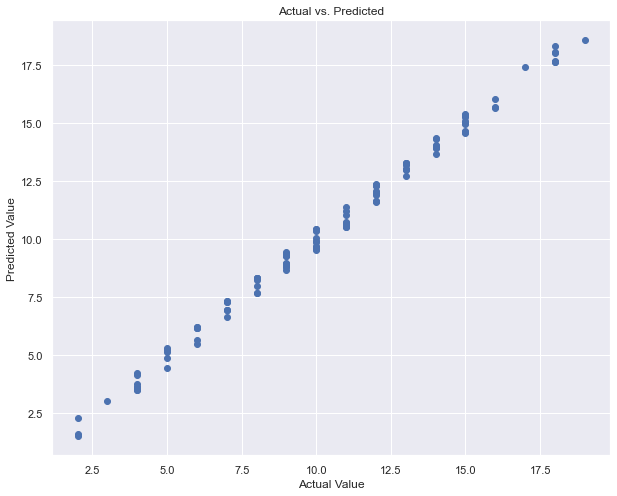

In [483]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted')

In [484]:
pred_y_df=pd.DataFrame({'Actual Exam No.':y_test,'Predicted Exam No.':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Exam No.,Predicted Exam No.,Difference
0,14.0,14.038756,-0.038756
1,11.0,10.658859,0.341141
2,9.0,9.358071,-0.358071
3,15.0,15.247789,-0.247789
4,16.0,15.676987,0.323013
5,12.0,12.316419,-0.316419
6,13.0,13.026057,-0.026057
7,11.0,10.659072,0.340928
8,9.0,8.791115,0.208885
9,15.0,15.354960,-0.354960


In [485]:
en_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,Gmean,Glabel,Glabel_n
0,0,F,18,U,GT3,0,4,4,at_home,teacher,...,1,1,3,6,5,6,6,5.666667,Bad,1
1,0,F,17,U,GT3,1,1,1,at_home,other,...,1,1,3,4,5,5,6,5.333333,Bad,1
2,0,F,15,U,LE3,1,1,1,at_home,other,...,2,3,3,10,7,8,10,8.333333,Bad,1
3,0,F,15,U,GT3,1,4,2,health,services,...,1,1,5,2,15,14,15,14.666667,Good,2
4,0,F,16,U,GT3,1,3,3,other,other,...,1,2,5,4,6,10,10,8.666667,Bad,1


In [486]:
en_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    int32   
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    int32   
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 